<a href="https://colab.research.google.com/github/miftahstudent/Pengolahan-Citra-Digital/blob/main/PeningkatanKontras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [1]:
!pip install opencv-python-headless # Menginstal library OpenCV untuk pengolahan gambar, versi headless agar bisa berjalan di lingkungan cloud.
from google.colab.patches import cv2_imshow # Mengimpor fungsi cv2_imshow dari Google Colab untuk menampilkan gambar di notebook.
import cv2 # Mengimpor library OpenCV dan memberikan alias cv2 untuk penggunaan yang lebih ringkas.
import numpy as np # Mengimpor library NumPy untuk komputasi numerik dan memberikan alias np.

# import gambar

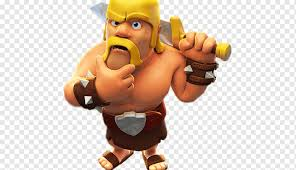

In [5]:
img = cv2.imread('gambar_barbar.jpg')
cv2_imshow(img)
cv2.destroyAllWindows()

# mengatur kontras

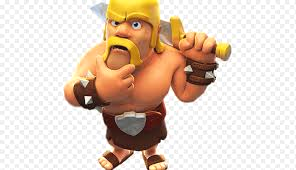

In [6]:
alpha = 1.0  # Faktor pengali kontras (1.0 - 3.0)
beta = 10   # Nilai penambah kecerahan (0 - 100)
adjusted = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
cv2_imshow(adjusted)
cv2.waitKey(0)
cv2.destroyAllWindows()

# mengatur White balance

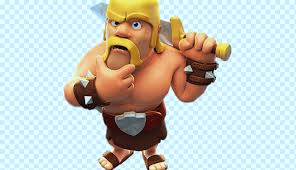

In [7]:
def white_balance(img): # Mendefinisikan fungsi bernama 'white_balance' yang menerima sebuah gambar 'img' sebagai input.
  result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) # Mengubah gambar 'img' dari ruang warna BGR ke LAB dan menyimpannya di variabel 'result'.
  avg_a = np.average(result[:, :, 1]) # Menghitung rata-rata nilai channel 'a' (warna) dari gambar 'result' dan menyimpannya di 'avg_a'.
  avg_b = np.average(result[:, :, 2]) # Menghitung rata-rata nilai channel 'b' (warna) dari gambar 'result' dan menyimpannya di 'avg_b'.
  result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1) # Menyesuaikan channel 'a' berdasarkan rata-rata 'avg_a' dan lightness (channel 'L').
  result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1) # Menyesuaikan channel 'b' berdasarkan rata-rata 'avg_b' dan lightness (channel 'L').
  result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR) # Mengubah gambar 'result' kembali dari ruang warna LAB ke BGR.
  return result # Mengembalikan gambar 'result' yang sudah di-white-balance.

balanced = white_balance(img) # Memanggil fungsi 'white_balance' dengan gambar 'img' dan menyimpan hasilnya di variabel 'balanced'.

# Menampilkan gambar setelah white balance
cv2_imshow(balanced) # Menampilkan gambar yang sudah di-white-balance.
cv2.waitKey(0)  # Menunggu hingga tombol keyboard ditekan.
cv2.destroyAllWindows() # Menutup semua jendela yang terbuka.

In [8]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
limg = cv2.merge((cl,a,b))
enhanced_clahe = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Mengatur saturasi

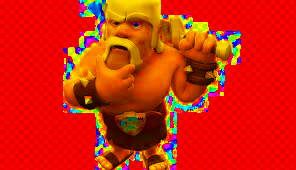

In [9]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
s = cv2.add(s, 500)  # Menambah nilai saturasi sebanyak yang kita mau
hsv = cv2.merge((h, s, v))
enhanced_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(enhanced_hsv)
cv2.waitKey(0)  # Menunggu input keyboard (tekan sembarang tombol untuk melanjutkan)
cv2.destroyAllWindows()

# Menampilkan hasil

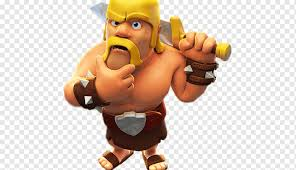

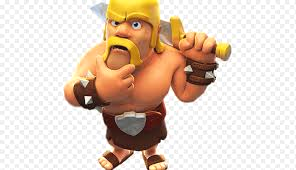

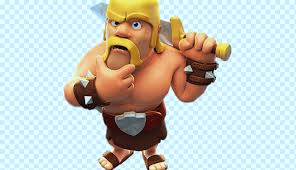

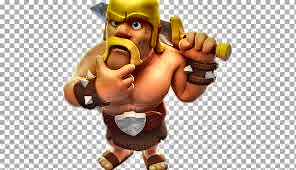

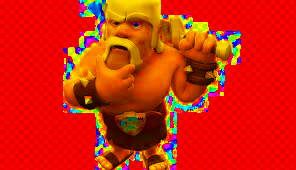

In [10]:
cv2_imshow(img)
cv2_imshow(adjusted)
cv2_imshow(balanced)
cv2_imshow(enhanced_clahe)
cv2_imshow(enhanced_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Akhir Semuanya
Kode tersebut bertujuan untuk melakukan peningkatan kualitas citra menggunakan library OpenCV dalam bahasa Python.

Pertama, kode tersebut melakukan peningkatan kontras dan kecerahan gambar. Kemudian, dilakukan white balancing untuk memperbaiki keseimbangan warna. Selanjutnya, kode menerapkan teknik CLAHE (Contrast Limited Adaptive Histogram Equalization) untuk meningkatkan kontras lokal dan detail gambar. Terakhir, dilakukan peningkatan saturasi warna pada gambar menggunakan ruang warna HSV.

Secara keseluruhan, kode tersebut mengimplementasikan beberapa teknik pengolahan citra untuk meningkatkan kualitas visual gambar, meliputi penyesuaian kontras, kecerahan, keseimbangan warna, detail, dan saturasi. Setiap teknik diaplikasikan dengan fungsi-fungsi OpenCV dan ditampilkan hasilnya menggunakan cv2_imshow.

Hasil akhir berupa gambar yang telah ditingkatkan kualitasnya dari berbagai aspek.